CoGaDB Exploration Results
===========================

## Example query

### Imports:

In [1]:
%matplotlib inline

from exploration import *

### Load csv files:

In [2]:
logDirectory = os.path.join(os.getcwd(), "logs")
logDirectory

'/home/chris/projects/cogadb/code/benchmarks/exploration/analysis/logs'

In [3]:
logEntries = concatCSVFiles(logDirectory)

In [4]:
data = createPandasDataFrame(logEntries)

### Variants for a query

Query:

In [5]:
query = data["Query"].unique()[0]
print("Selecting: ", query)

Selecting:  grouped_aggregation_query_1


In [6]:
filtered = data[(data.Query==query)]
filtered = filtered[["Query", "Host", "DeviceType", "Device", "VariantTag", "Variant", "Median", "Mean", "Stdev"]]

In [7]:
filtered

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
0,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fast,parallel_global_atomic_single_pass,0.249208,0.318730,0.222212
1,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,serial_single_pass,0.265625,0.353558,0.128570
2,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Slow,parallel_three_pass,0.491590,0.466837,0.070860
3,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fast,sequential,0.252726,0.312408,0.100564
4,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Slow,coalesced,0.255858,0.338654,0.114170
5,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fast,false,0.255444,0.313701,0.100822
6,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Slow,true,0.468588,0.371610,0.114893
7,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Combined,sequential-false-parallel_global_atomic_single...,0.253407,0.252697,0.005785
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-sequential,0.029986,0.030798,0.003627
9,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,coalesced-false-sequential,0.032019,0.034239,0.005580


### Selecting the fastest variants

In [8]:
fastest = filtered[(filtered.VariantTag=="Fastest")]

In [9]:
fastest

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-sequential,0.029986,0.030798,0.003627
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235


### Retrieve the variant names

In [10]:
optimalVariants = fastest.Variant.unique()

In [11]:
print("Optimal Variants:")
for optimalVariant in optimalVariants:
    print("\t", optimalVariant)

Optimal Variants:
	 coalesced-true-sequential
	 coalesced-true-atomic_workgroup


### Retrieve their performance on all devices

In [12]:
optimal = filtered[(filtered.Variant.isin(optimalVariants))]

In [13]:
optimal

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-sequential,0.029986,0.030798,0.003627
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235
38,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Variant,coalesced-true-sequential,8.273240,8.274560,0.003646


### Select the best variants from Feature-wise Exploration

In [14]:
learned = filtered[(filtered.VariantTag=="Combined")]

In [15]:
learned

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
7,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Combined,sequential-false-parallel_global_atomic_single...,0.253407,0.252697,0.005785
23,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Combined,coalesced-false-serial_single_pass,1.303680,1.304120,0.003696


### Combine both sets of Variants

In [16]:
combined = pd.concat([optimal, learned])

In [17]:
combined

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-sequential,0.029986,0.030798,0.003627
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235
38,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Variant,coalesced-true-sequential,8.273240,8.274560,0.003646
7,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Combined,sequential-false-parallel_global_atomic_single...,0.253407,0.252697,0.005785
23,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Combined,coalesced-false-serial_single_pass,1.303680,1.304120,0.003696


### Calculate quantiles per device

In [18]:
grouping = ["Query", "Host", "DeviceType", "Device"]
device = filtered.groupby(grouping)

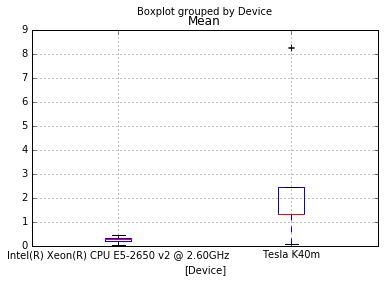

In [19]:
filtered.boxplot(column="Mean", by=["Device"])

In [20]:
q01 = device.Mean.quantile(0.01)

In [21]:
q25 = device.Mean.quantile(0.25)

In [22]:
q50 = device.Mean.quantile(0.50)

In [23]:
q75 = device.Mean.quantile(0.75)

In [24]:
q99 = device.Mean.quantile(0.99)

In [25]:
quantiles = pd.DataFrame({'Q01': q01, 'Q25': q25, 'Q50': q50, 'Q75': q75, 'Q99': q99})

In [26]:
quantiles

Q01  \
Query                       Host  DeviceType Device                                                
grouped_aggregation_query_1 gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.031100   
                                  dgpu       Tesla K40m                                 0.063759   

                                                                                             Q25  \
Query                       Host  DeviceType Device                                                
grouped_aggregation_query_1 gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.190135   
                                  dgpu       Tesla K40m                                 1.312655   

                                                                                             Q50  \
Query                       Host  DeviceType Device                                                
grouped_aggregation_query_1 gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.285722   
                                  dgpu       Tesla K40m                                 1.316885   

                                                                                             Q75  \
Query                       Host  DeviceType Device                                                
grouped_aggregation_query_1 gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.341139   
                                  dgpu       Tesla K40m                                 2.444307   

                                                                                             Q99  
Query                       Host  DeviceType Device                                               
grouped_aggregation_query_1 gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.452553  
                                  dgpu       Tesla K40m                                 8.276162